In [1]:
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import time

In [2]:
################# DATA PREPROCESSING ####################
# loading train dataset, and dropping last column of "NaN"
train = pd.read_csv("dataset.txt", sep=" ", header=None)     
train = train.drop(train.columns[-1],axis=1)

# setting up x_train array (training nunbers) and y_train array (training labels)
nums = train.drop(train.columns[0],axis=1)
x_train = np.array(nums)
labels = train[0]
y_train = np.array(labels)

# loading test dataset, and dropping last column of "NaN"
test = pd.read_csv("test.txt", sep=" ", header=None)
test = test.drop(test.columns[-1],axis=1)

# setting up x_test array (testing numbers)
x_test = np.array(test)
##########################################################

In [3]:
############ HYPERPARAMETERS ############
rows = train.shape[0]               # (50000) number of training samples (happens to be number of testing samples too)
cols = train.shape[1] - 1           # (100)   number of numbers for each sample, minus 1 for labels
batch_size = 64                     # batch size for more efficient training
epochs = 50                         # number of epochs to train for 
##########################################

In [4]:
############ GRAPHING #############
# points = []
# for i in range(data.shape[0]):
#     for j in range(1, data.shape[1]):
#         point = (j, data[j][0])
#         points.append(point)
# x_val = [x[0] for x in points]
# y_val = [x[1] for x in points]

# plt.scatter(x_val,y_val, color='r')
# plt.show()
####################################

In [5]:
inputs = keras.Input(shape=(100,), name="rows")
x1 = layers.Dense(64, activation="relu")(inputs)
x2 = layers.Dense(64, activation="relu")(x1)
outputs = layers.Dense(8, name="predictions")(x2)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
# gradient descent optimizer.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# sparse categorical cross-entropy loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()

# Preparing the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)


In [ ]:
accuracies = []
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Update training metric.
        train_acc_metric.update_state(y_batch_train, logits)

        # # Log every 200 batches.
        # if step % 200 == 0:
        #     print(
        #         "Training loss (for one batch) at step %d: %.4f"
        #         % (step, float(loss_value))
        #     )
        #     print("Seen so far: %d samples" % ((step + 1) * 64))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))
    accuracies.append(float(train_acc))
    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    print("Time taken: %.2fs" % (time.time() - start_time))

Text(0, 0.5, 'Accuracy')

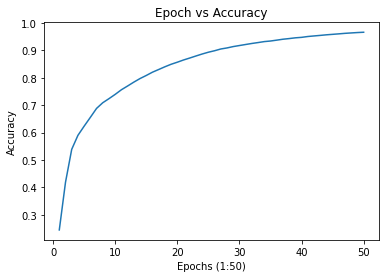

In [11]:
eps = np.linspace(1, epochs, 50)
plt.plot(eps, accuracies)
plt.title("Epoch vs Accuracy")
plt.xlabel("Epochs (1:50)")
plt.ylabel("Accuracy")
plt.show()

In [113]:
preds = model.predict(x_test)

In [114]:
winners = []
for row in range(preds.shape[0]):
    winner = np.argmax(preds[row])
    winners.append(winner)

In [116]:
text = open("FQ2Predicts_Delevski_673541753.txt", "w")
for letter in winners:
    text.write(str(letter))
text.close()